In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from random import random
!pip install citipy
from citipy import citipy

You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
"""
Four observations on this data:
1. Temperature peaks around the equator. The highest latitudes are siginificantly colder than everywhere else.
2. Cloudiness seems to cluster around certain bands (namely 0, 90+), which may reflect how this data is measured.
3. Wind speed follows a similar, if less pronounced trend as temperature--lowest around the equator, peaking at higher latitudes.
4. More a caveat than an observation: it's February. It's summer south of the equator, and it's not hurricane season. 
This data would be dramatically different at other parts of the year.
"""

/Users/owenpoindexter/Desktop/API_homework


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
call_city = "Chicago"
api_key = "&APPID=06adbdce6dd87a612650d7b0cb3c8061"

In [5]:
call_url = base_url + call_city + api_key

In [30]:
lat_study = pd.DataFrame(columns=['City', 'Latitude', 'High Temp', 'Humidity', 'Clouds', "Wind Speed"])

In [31]:
lat_study

,City,Latitude,High Temp,Humidity,Clouds,Wind Speed


In [32]:
for i in range (0,500):
    new_lat = (180*random())-90
    new_long = (360*random())-180
    new_city = citipy.nearest_city(new_lat, new_long)
    lat_study.loc[i, 'City'] = new_city.city_name
    call_city = str(new_city.city_name)
    try:
        call_url = base_url + call_city + api_key
        response = requests.get(call_url).json()
        lat_study.loc[i, 'Latitude'] = response['coord']['lat']
        lat_study.loc[i, 'High Temp'] = (response['main']['temp']) - 273.15
        lat_study.loc[i, 'Humidity'] = response['main']['humidity']
        lat_study.loc[i, 'Clouds'] = response['clouds']['all']
        lat_study.loc[i, 'Wind Speed'] = response['wind']['speed']
    except (KeyError, IndexError, ValueError):
              print("No json found")

No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found
No json found


In [25]:
lat_study['Abs Latitude'] = abs(lat_study["Latitude"])

In [33]:
lat_study.head()

,City,Latitude,High Temp,Humidity,Clouds,Wind Speed
0,ribeira grande,38.52,17.293,95,80,9.96
1,labuhan,-2.54,27.393,84,80,1.36
2,campbell river,50.02,-6.51,79,75,7.7
3,atuona,-9.8,27.018,100,64,6.31
4,mehamn,71.03,-10.5,78,0,3.1


In [34]:
lat_study.to_csv('latitude_csv')

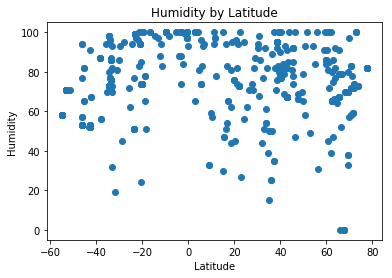

In [50]:
plt.scatter(lat_study['Latitude'], lat_study['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity by Latitude")
plt.savefig(fname="Humidity_by_Lat", format="png")

Text(0.5,1,'Temperature (in Celcius) by Latitude')

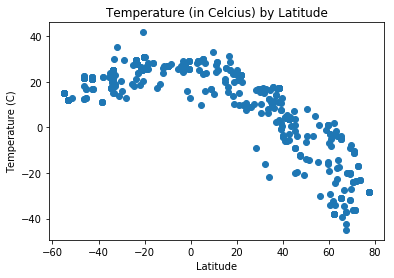

In [48]:
plt.scatter(lat_study["Latitude"], lat_study["High Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Temperature (in Celcius) by Latitude")
plt.savefig(fname="Temp_by_Lat", format="png")

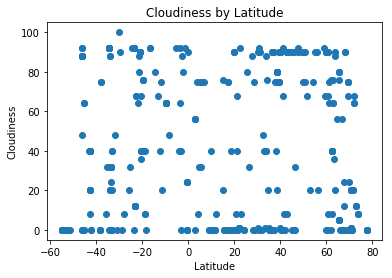

In [51]:
plt.scatter(lat_study["Latitude"], lat_study["Clouds"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness by Latitude")
plt.savefig(fname="Cloudiness_by_Lat", format="png")

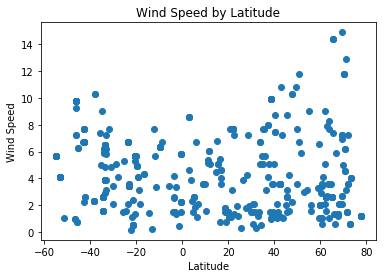

In [52]:
plt.scatter(lat_study["Latitude"], lat_study["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed by Latitude")
plt.savefig(fname="Wind_Speed_by_lat", format="png")